<a href="https://colab.research.google.com/github/dinhkhoathoanganh/SnopesWebScraping/blob/main/Webscrape_snopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GS x SMU - Introduction to Web Scraping

## Workshop Details
**Time:** Friday, 4 August 2023. 7:30pm - 10:30pm  
**Location:** Singapore Management University (Computing Lab)  
**Organizer:** Goldman Sachs  

## 01 - Introduction
### Scraping one element of a page

Welcome to your programming assignment! You will learn to scrape websites using [BeautifulSoup](https://pypi.org/project/beautifulsoup4/) to scrape a Fact Checker web portal [Snopes.com](https://www.snopes.com/). This code will scrape the **title** of the Snopes fact check page.


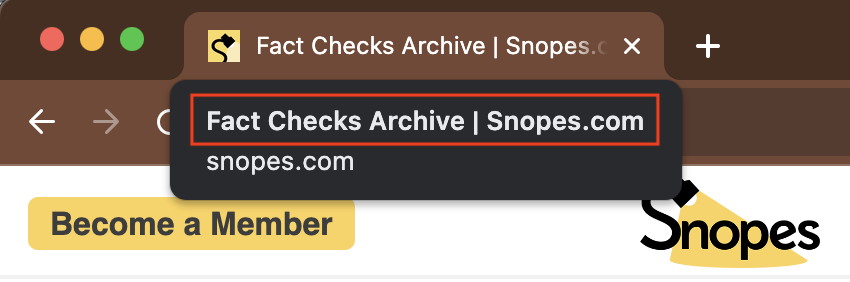

#### Technical FYI
Include a user agent string in your requests that identifies you as a scraper.
Here are some examples of user-agent strings:

*   **Mozilla/5.0** (the default user-agent string for Firefox)
*   **Chrome/99.0.4844.84** (the user-agent string for Google Chrome)
*   **Safari/537.36** (the user-agent string for Apple Safari)

In [1]:
# Import the necessary libraries
import requests
from bs4 import BeautifulSoup

# Get the URL of the Snopes fact check page
url = "https://www.snopes.com/fact-check/"

# Make a request to the URL (Notebook execution on Chrome)
response = requests.get(url, headers={"User-Agent": "Chrome/99.0.4844.84"})

# Parse the response into a BeautifulSoup object
soup = BeautifulSoup(response.content, "html.parser")

# Print the title of the page
print(soup.title.text)


Fact Checks Archive | Snopes.com


### Scraping multiple elements of a page
We will now explore scraping specific website date. This code will scrape the **title** of each fact check article on the Snopes fact check page.

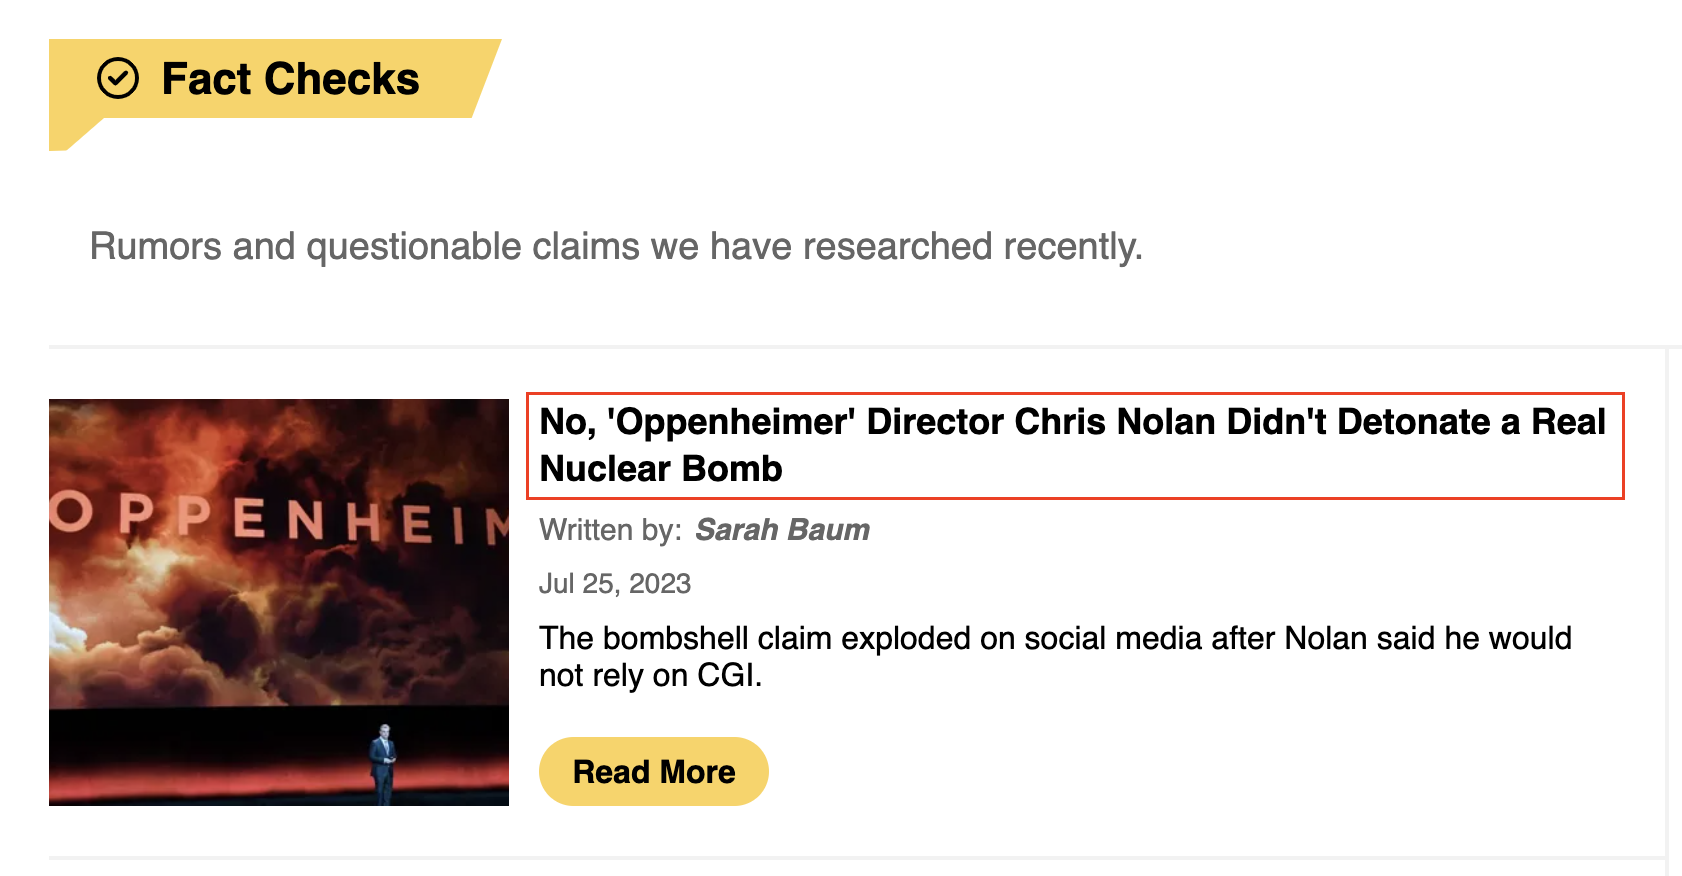

In [2]:
# Import the necessary libraries
import requests
from bs4 import BeautifulSoup

PAGE_NUM = 1

# Get the URL for the current page.
url = "https://www.snopes.com/fact-check/?pagenum={}".format(PAGE_NUM)

# Make a request to the URL
response = requests.get(url, headers={"User-Agent": "Chrome/99.0.4844.84"})

# Parse the response into a BeautifulSoup object
soup = BeautifulSoup(response.content, "html.parser")

# Find all of the fact check articles on the page
fact_check_articles = soup.find_all("div", class_="article_wrapper")

# Iterate through the fact check articles and print the title of each article
for fact_check_article in fact_check_articles:
    print(fact_check_article.find("h3").text)


Did Kodak Hide Invention of the Digital Camera in the '70s to Avoid Loss of Film Sales?
Does Hello Kitty's 'Boyfriend', Dear Daniel, Identify As a Girl?
Did Anthropologist Margaret Mead Say the 'First Sign of Civilization' Is a Healed Femur?
Did Paramount Say It May 'Cut' CMT After the Channel 'Lost Their Audience'?
Did Beyoncé Wear Heels Modeled After Her Own Butt and Legs?
Are Folded, Fentanyl-Laced Dollar Bills a Widespread Safety Threat?
Does This Pic of Stairs on the Exterior of a Concrete Building Show a 'Funny Construction Fail'?
Did Prince Say, 'Money Won't Buy You Happiness, But It'll Pay for the Search'?
Is This a Real Email From Sinead O'Connor to Piers Morgan About Meghan Markle?
Ukraine Video Does Not Show Women Carrying Film Prop Stones Out of Church Hit by Russian Airstrike
Did US Olympics Women's Teams Threaten to Quit Over Trans Athlete Lia Thomas Try-Out?
Will US Passport Holders Be Required to Get a Visa to Enter EU in 2024?
Does Twitter's 'Like' Button Become an 'X'

### Scraping multiple elements of a page - Diving Deeper
Let us scrape mutliple elements of the articles from the Snopes fact check page.
1.   Article Title
2.   Fact Checker's Name
3.   Fact Check Date

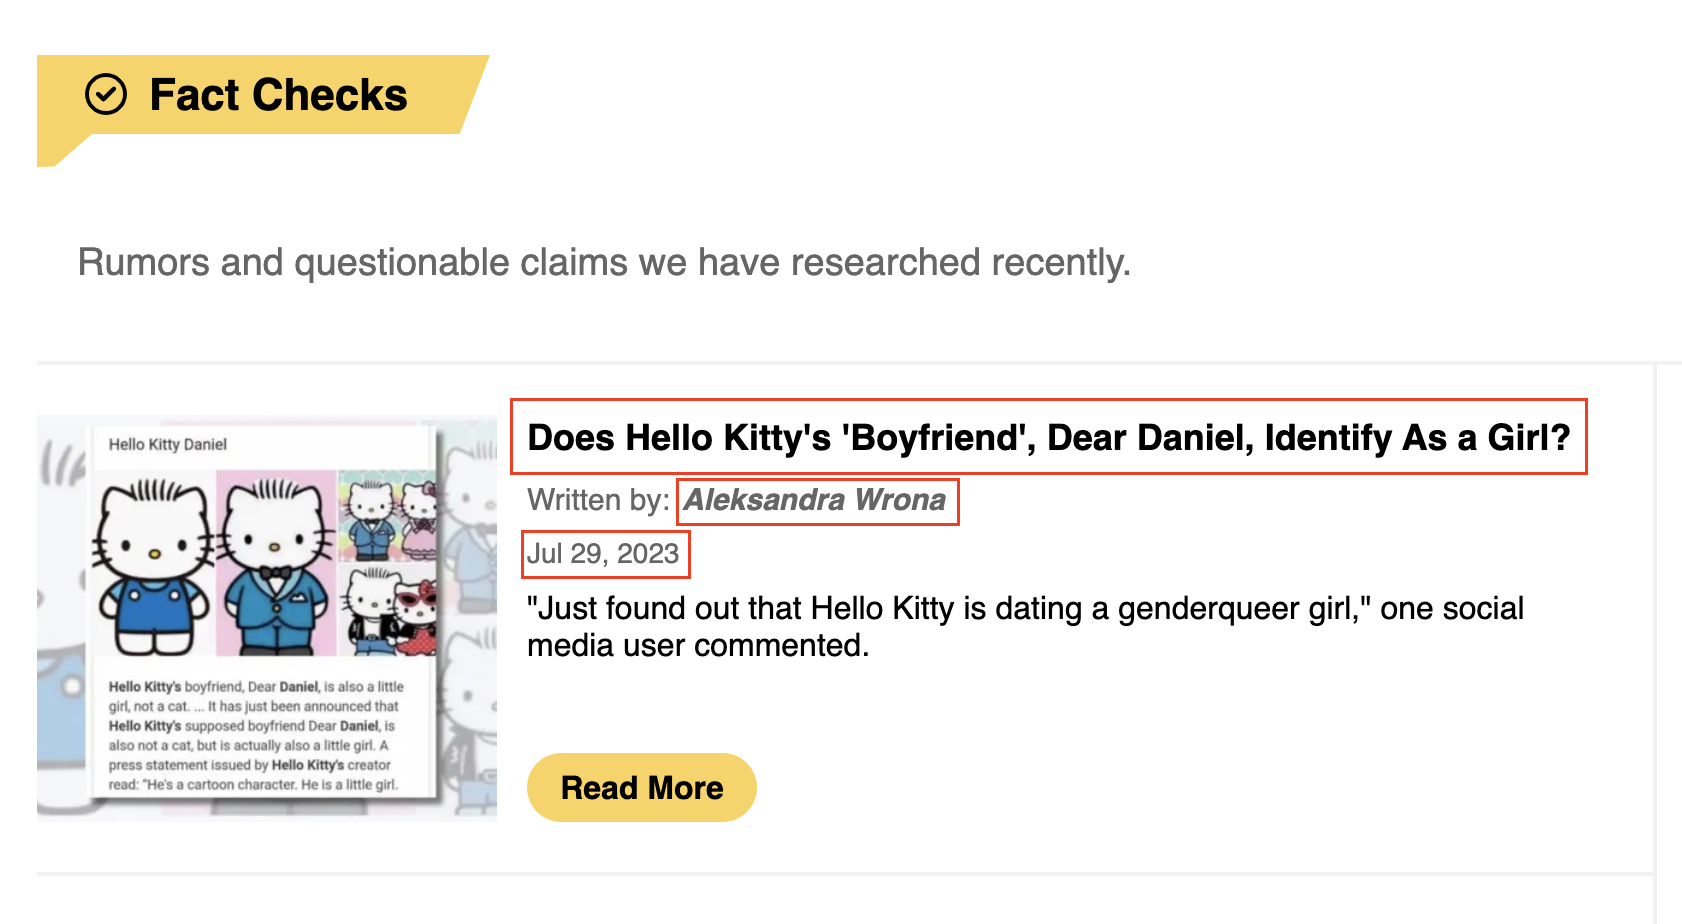

In [3]:
# Import the necessary libraries
import requests
from bs4 import BeautifulSoup

PAGE_NUM = 1

# Get the URL for the current page.
url = "https://www.snopes.com/fact-check/?pagenum={}".format(PAGE_NUM)

# Make a request to the URL
response = requests.get(url, headers={"User-Agent": "Chrome/99.0.4844.84"})

# Parse the response into a BeautifulSoup object
soup = BeautifulSoup(response.content, "html.parser")

# Find all of the fact check articles on the page
fact_check_articles = soup.find_all("div", class_="article_wrapper")

# Iterate through the fact check articles and print the following information for each article:
#     * Fact checker's name
#     * Date of the fact check
#     * Article title

for fact_check_article in fact_check_articles:
    fact_checker_name = fact_check_article.find(
        "div", class_="author_name_box"
    ).find("span", class_="author_name").text.strip()

    date = fact_check_article.find("span", class_="article_date").text.strip()

    title = fact_check_article.find("h3", class_="article_title").text.strip()

    print(f"Fact checker's name: {fact_checker_name}")
    print(f"Date of the fact check: {date}")
    print(f"Article title: {title}")


Fact checker's name: Alex Kasprak
Date of the fact check: Jul 30, 2023
Article title: Did Kodak Hide Invention of the Digital Camera in the '70s to Avoid Loss of Film Sales?
Fact checker's name: Aleksandra Wrona
Date of the fact check: Jul 29, 2023
Article title: Does Hello Kitty's 'Boyfriend', Dear Daniel, Identify As a Girl?
Fact checker's name: Nur Ibrahim
Date of the fact check: Jul 28, 2023
Article title: Did Anthropologist Margaret Mead Say the 'First Sign of Civilization' Is a Healed Femur?
Fact checker's name: Jordan Liles
Date of the fact check: Jul 28, 2023
Article title: Did Paramount Say It May 'Cut' CMT After the Channel 'Lost Their Audience'?
Fact checker's name: Sarah Baum
Date of the fact check: Jul 28, 2023
Article title: Did Beyoncé Wear Heels Modeled After Her Own Butt and Legs?
Fact checker's name: Bethania Palma
Date of the fact check: Jun 13, 2022 (Updated: Jul 27, 2023)
Article title: Are Folded, Fentanyl-Laced Dollar Bills a Widespread Safety Threat?
Fact checke

## 02 - Scraping multiple pages and storing them in a dictionary
We will scrape multiple pages and store the elements in a dictionary
1.   Article Title
2.   Fact Checker's Name
3.   Fact Check Date
4.   Article Link


In [4]:
import requests
from bs4 import BeautifulSoup


PAGE_START = 1
PAGE_END = 5

def scrape_fact_checks(page_num):

    # Get the URL for the current page.
    url = "https://www.snopes.com/fact-check/?pagenum={}".format(page_num)

    # Make a request to the URL.
    response = requests.get(url, headers={"User-Agent": "Chrome/99.0.4844.84"})

    # Parse the response into a BeautifulSoup object.
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all of the fact check articles on the page.
    fact_check_articles = soup.find_all("div", class_="article_wrapper")

    # Iterate through the fact check articles.
    fact_checks = []
    for fact_check_article in fact_check_articles:

        # Get the fact checker's name.
        fact_checker_name = fact_check_article.find(
            "div", class_="author_name_box"
        ).find("span", class_="author_name").text.strip()

        # Get the date of the fact check.
        date = fact_check_article.find("span", class_="article_date").text.strip()

        # Get the article title.
        title = fact_check_article.find("h3", class_="article_title").text.strip()

        # Get the article link.
        link = fact_check_article.find("a")["href"].strip()

        # Add the scraped data to the fact checks list.
        fact_checks.append({
            "fact_checker_name": fact_checker_name,
            "title": title,
            "date": date,
            "link": link,
        })

    return fact_checks


if __name__ == "__main__":

    # Get the fact checks for the first 100 pages.
    fact_checks = []
    for page_num in range(PAGE_START, PAGE_END + 1):
        fact_checks += scrape_fact_checks(page_num)

    # Print the fact checks.
    for fact_check in fact_checks:
        print(fact_check)


{'fact_checker_name': 'Alex Kasprak', 'title': "Did Kodak Hide Invention of the Digital Camera in the '70s to Avoid Loss of Film Sales?", 'date': 'Jul 30, 2023', 'link': 'https://www.snopes.com/fact-check/eastman-kodak-invented-first-digital-camera/'}
{'fact_checker_name': 'Aleksandra Wrona', 'title': "Does Hello Kitty's 'Boyfriend', Dear Daniel, Identify As a Girl?", 'date': 'Jul 29, 2023', 'link': 'https://www.snopes.com/fact-check/hello-kitty-dear-daniel/'}
{'fact_checker_name': 'Nur Ibrahim', 'title': "Did Anthropologist Margaret Mead Say the 'First Sign of Civilization' Is a Healed Femur?", 'date': 'Jul 28, 2023', 'link': 'https://www.snopes.com/fact-check/margaret-mead-healed-femur/'}
{'fact_checker_name': 'Jordan Liles', 'title': "Did Paramount Say It May 'Cut' CMT After the Channel 'Lost Their Audience'?", 'date': 'Jul 28, 2023', 'link': 'https://www.snopes.com/fact-check/paramount-cut-cmt/'}
{'fact_checker_name': 'Sarah Baum', 'title': 'Did Beyoncé Wear Heels Modeled After Her

## 03 - Error Handling in Web Scraping
Visit and scrape each individual page to extract

1.   Claim Statement
2.   Description
3.   Fact check Rating

The code snippet will **throw errors** because of the presence of some **NULL** elements

In [5]:
import requests
from bs4 import BeautifulSoup


PAGE_START = 1
PAGE_END = 10

def scrape_fact_checks(page_num):

    # Get the URL for the current page.
    url = "https://www.snopes.com/fact-check/?pagenum={}".format(page_num)

    # Make a request to the URL.
    response = requests.get(url, headers={"User-Agent": "Chrome/99.0.4844.84"})

    # Parse the response into a BeautifulSoup object.
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all of the fact check articles on the page.
    fact_check_articles = soup.find_all("div", class_="article_wrapper")

    # Iterate through the fact check articles.
    fact_checks = []
    for fact_check_article in fact_check_articles:

        # Get the fact checker's name.
        fact_checker_name = fact_check_article.find(
            "div", class_="author_name_box"
        ).find("span", class_="author_name").text.strip()

        # Get the date of the fact check.
        date = fact_check_article.find("span", class_="article_date").text.strip()

        # Get the article title.
        title = fact_check_article.find("h3", class_="article_title").text.strip()

        # Get the article link.
        link = fact_check_article.find("a")["href"].strip()

        # Get the description, claim, and rating from the link.
        link_soup = BeautifulSoup(requests.get(link).content, "html.parser")
        description = link_soup.find("section", class_="title-container").find("h2").text.strip()
        claim = link_soup.find("div", class_="claim_cont").text.strip()
        rating = link_soup.find("div", class_="rating_title_wrap").text.strip()

        # Add the scraped data to the fact checks list.
        fact_checks.append({
            "fact_checker_name": fact_checker_name,
            "claim": claim,
            "rating": rating,
            "title": title,
            "description": description,
            "date": date,
            "link": link,
        })

    return fact_checks


if __name__ == "__main__":

    # Get the fact checks for the first 100 pages.
    fact_checks = []
    for page_num in range(PAGE_START, PAGE_END + 1):
        print(f"Scraping page: {page_num}")
        fact_checks += scrape_fact_checks(page_num)

    # Print the fact checks.
    for fact_check in fact_checks:
        print(fact_check)


Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7


AttributeError: ignored

## 04 - Putting everything together

Finally, to stitch everything together, we will scrape each article to extract
1.   Article
    1.   Title
    2.   Date
    3.   Fact Checker's Name
    4.   Link
2.   Claim
    1.   Title
    2.   Description
    2.   Info
    3.   Rating

The key information to be scraped is **Claim Rating**. These ratings have various categories detailed here -- https://www.snopes.com/fact-check-ratings/. Some of the rations are given below.
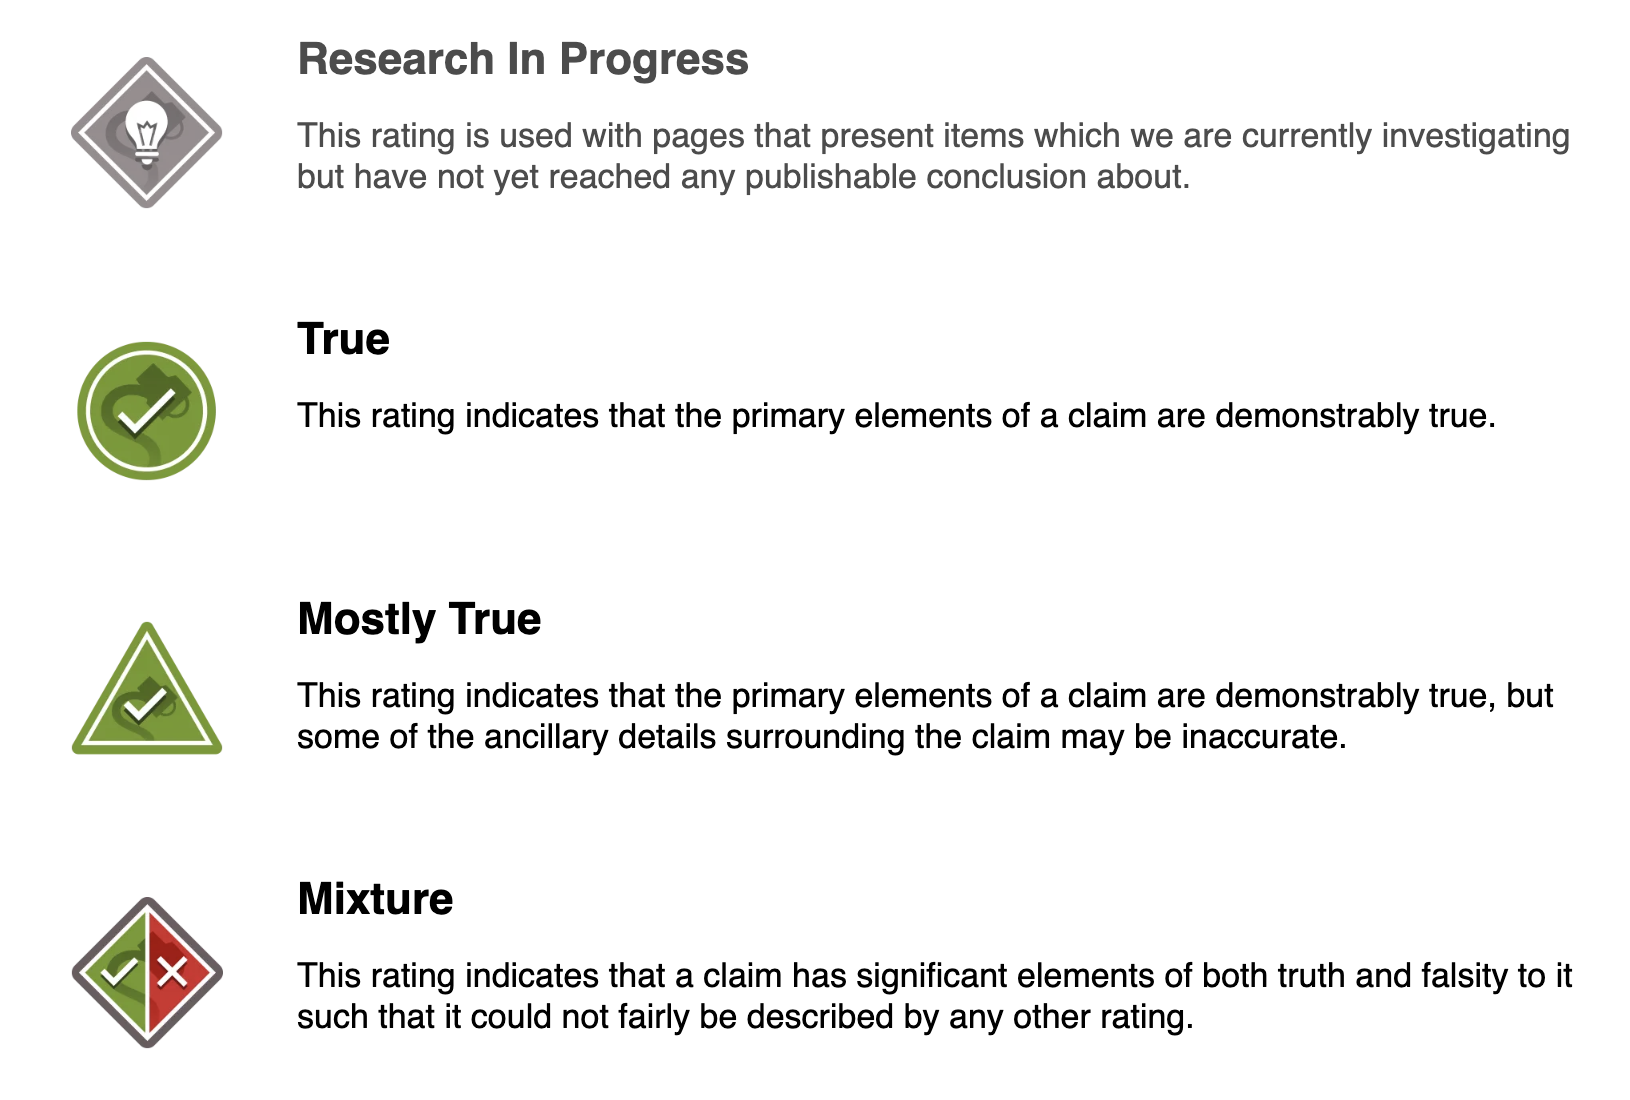


In [ ]:
import requests
from bs4 import BeautifulSoup


PAGE_START = 1
PAGE_END = 3

def scrape_fact_checks(page_num):

    # Get the URL for the current page.
    url = "https://www.snopes.com/fact-check/?pagenum={}".format(page_num)

    # Make a request to the URL.
    response = requests.get(url, headers={"User-Agent": "Chrome/99.0.4844.84"})

    # Parse the response into a BeautifulSoup object.
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all of the fact check articles on the page.
    fact_check_articles = soup.find_all("div", class_="article_wrapper")

    # Iterate through the fact check articles.
    fact_checks = []
    for fact_check_article in fact_check_articles:

        # Get the fact checker's name.
        try:
            fact_checker_name = fact_check_article.find(
                "div", class_="author_name_box"
            ).find("span", class_="author_name").text.strip()
        except:
            fact_checker_name = None

        # Get the date of the fact check.
        try:
            date = fact_check_article.find("span", class_="article_date").text.strip()
        except:
            date = None

        # Get the article title.
        try:
            title = fact_check_article.find("h3", class_="article_title").text.strip()
        except:
            title = None

        # Get the article link.
        try:
            link = fact_check_article.find("a")["href"].strip()
        except:
            link = None

        # Get the description, claim, and rating from the link.
        if link:
            link_soup = BeautifulSoup(requests.get(link).content, "html.parser")
            try:
                description = link_soup.find("section", class_="title-container").find("h2").text.strip()
            except:
                description = None
            try:
                claim = link_soup.find("div", class_="claim_cont").text.strip()
            except:
                claim = None
            try:
                rating = link_soup.find("div", class_="rating_title_wrap").text.strip().split("\t")[0].strip()
            except:
                rating = None
        else:
            description = None
            claim = None
            rating = None

        # Add the scraped data to the fact checks list.
        fact_checks.append({
            "fact_checker_name": fact_checker_name,
            "claim": claim,
            "rating": rating,
            "title": title,
            "description": description,
            "date": date,
            "link": link,
        })

    return fact_checks


if __name__ == "__main__":

    # Get the fact checks for the first 100 pages.
    fact_checks = []
    for page_num in range(PAGE_START, PAGE_END + 1):
        print(f"Scraping page: {page_num}")
        fact_checks += scrape_fact_checks(page_num)

    # Print the fact checks.
    for fact_check in fact_checks:
        print(fact_check)

    # Print the URLs of the fact checks that did not have all of the information.
    for fact_check in fact_checks:
        for key, value in fact_check.items():
            if value is None:
                print(f"Missing element: {key} for url: {fact_check['link']}")


## 05 - BONUS: Scrape with Periodic Data Store

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import google.colab.files as files

OUTPUT_FILE_NAME = "fact_checks.csv"
INTERVAL_PAGE_NUM = 2
PAGE_START = 1
PAGE_END = 5

def scrape_fact_checks(page_num):

    # Get the URL for the current page.
    url = "https://www.snopes.com/fact-check/?pagenum={}".format(page_num)

    # Make a request to the URL.
    response = requests.get(url, headers={"User-Agent": "Chrome/99.0.4844.84"})

    # Parse the response into a BeautifulSoup object.
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all of the fact check articles on the page.
    fact_check_articles = soup.find_all("div", class_="article_wrapper")

    # Iterate through the fact check articles.
    fact_checks = []
    for fact_check_article in fact_check_articles:

        # Get the fact checker's name.
        try:
            fact_checker_name = fact_check_article.find(
                "div", class_="author_name_box"
            ).find("span", class_="author_name").text.strip()
        except:
            fact_checker_name = None

        # Get the date of the fact check.
        try:
            date = fact_check_article.find("span", class_="article_date").text.strip()
        except:
            date = None

        # Get the article title.
        try:
            title = fact_check_article.find("h3", class_="article_title").text.strip()
        except:
            title = None

        # Get the article link.
        try:
            link = fact_check_article.find("a")["href"].strip()
        except:
            link = None

        # Get the description, claim, and rating from the link.
        if link:
            link_soup = BeautifulSoup(requests.get(link).content, "html.parser")
            try:
                description = link_soup.find("section", class_="title-container").find("h2").text.strip()
            except:
                description = None
            try:
                claim = link_soup.find("div", class_="claim_cont").text.strip()
            except:
                claim = None
            try:
                rating = link_soup.find("div", class_="rating_title_wrap").text.strip().split("\t")[0].strip()
            except:
                rating = None
        else:
            description = None
            claim = None
            rating = None

        # Add the scraped data to the fact checks list.
        fact_checks.append({
            "fact_checker_name": fact_checker_name,
            "claim": claim,
            "rating": rating,
            "title": title,
            "description": description,
            "date": date,
            "link": link,
        })

    return fact_checks


def save_fact_checks(fact_checks):

    # Open the output CSV file in write mode.
    with open(OUTPUT_FILE_NAME, "w", newline="") as csvfile:

        # Create a CSV writer object.
        writer = csv.writer(csvfile, delimiter=",")

        # Write the header row.
        writer.writerow([
            "fact_checker_name",
            "claim",
            "rating",
            "title",
            "description",
            "date",
            "link",
        ])

        # Write the fact checks data.
        for fact_check in fact_checks:
            writer.writerow(fact_check.values())


def main():

    # Initialize the fact checks list.
    fact_checks = []

    # Iterate through the pages and scrape the fact checks.
    for page_num in range(PAGE_START, PAGE_END + 1):
        print(f"Scraping page: {page_num}")
        fact_checks += scrape_fact_checks(page_num)

        # Save the fact checks to a CSV file every INTERVAL_PAGE_NUM pages.
        if page_num % INTERVAL_PAGE_NUM == 0:
            print(f"... Saving till page {page_num}")
            save_fact_checks(fact_checks)

    # Save the final set of fact checks to a CSV file.
    save_fact_checks(fact_checks)

    # Print a message to the user.
    print(f"Finished scraping {len(fact_checks)} fact checks.")

    # Print the URLs of the fact checks that did not have all of the information.
    for fact_check in fact_checks:
        for key, value in fact_check.items():
            if value is None:
                print(f"Missing element: {key} for url: {fact_check['link']}")

    # Download the CSV file to the local filesystem.
    files.download(OUTPUT_FILE_NAME)


if __name__ == "__main__":
    main()


### View Saved Files

In [ ]:
!ls -ltr

In [ ]:
files.download(OUTPUT_FILE_NAME)